# Лекція з ООП у Python

## Все що є у Python - об'єкт

Python - це об'єктно-орієнтована мова програмування, і все що є у цій мові є об'єктом - функції, строки, списки та інші типи даних зі своїми методами.

У Python є вбудована функція `isinstance(object, classinfo)`, яка поветрає `True`, якщо `object` є інстансом (об'єктом) класу `classinfo`, і `False` у протилежному випадку. Тож тезу *у Python все - об'єкт* можно з легкістю перевірити:

In [1]:
a = 5
isinstance(a, int)

True

In [5]:
b = "бавовна"
isinstance(b, str)

True

Що це нам дає? Наприклад, ми можемо вспадкувати вбудований тип даних та перевизначити будь-який метод, проте спершу давайте розберемося з особливостями ООП у Python

## Класи і Python

Перш за все, як і будь-якій об'єктно-орієнтованій мові програмування, у класі на Python ми можемо визначити атрибути і методи (як класа так і об`єкта):

In [17]:
class Car:
    vehicle_type = "passenger"

    def __init__(self, name: str, price: int):
        self.name = name
        self.price = price

    def info(self) -> None:
        print(f"This is {self.vehicle_type} car {self.name} which costs ${self.price}")

        
audi = Car("Audi RS7", 100_000)

audi.info()

This is passenger car Audi RS7 which costs $100000


Тільки що ми створили та проініцюювали об'єкт класу `Car`.
* `__init__` - це конструктор, у якому ми ініціюємо об'єкт. Він викликається автоматично при створенні об'єкта. Це приклад магічного метода, розповідь про які піде нижче
* `self` - це вказівник на об'єкт, який викликає метод (як `this` у, наприклад, C++, JS)

Ми також дуже просто можемо змінити значення будь-якого атрибута (і навіть метода) або додати новий (додавання нового є не дуже хорошою практикою):

In [9]:
audi.name = "Audi A5"
audi.name

'Audi A5'

In [10]:
audi.mileage = 50_000
audi.mileage

50000

Атрибути і методи класа доступні як для самого класа так і для його об'єкта. Як вже було сказано - все об'єкт у Python, навіть самі класи

In [13]:
Car.vehicle_type

'passenger'

## Парадигми ООП у Python

### Інкапсуляція (відокремлення одних компонентів програми від інших)

У Python реалізовано за допомогою одного підкреслення `_` або двох `__` на початку назви атрибута або метода.
Щодо цих підкреслень, то між `_` у Python та `protected` у багатьох інших мовах можна провести паралель, як і між `__` та `private` (ті методи, що не мають підкреслення на початку є `public`)

Атрибути усіх цих типів є доступними всередині класу. Зовні ж - доступними є `public` та `protected`. Хоча будь-яке нормальне IDE вкаже вам, що виклик `protected` метода зовні є "bad practice".

Інкапсуляція в Python є доволі умовною і більше є показником для інших розробників, що деякі компоненти краще зовні не викликати.

Менше слів більше справ:

In [30]:
class Person:
    def __init__(self, age: int, address: str, money: int):
        self.age = age  # public
        self._address = address  # protected
        self.__money = money  # private

    def __has_enough_money(self, check_amount: int) -> bool:  # private method
        return self.__money >= check_amount

    def show_address(self) -> None:  # public method
        print(self._address)

    def buy_ticket(self, price: int):  # public method
        if self.__has_enough_money(price):
            self.__money -= price
            print(f"Bought ticket")
        else:
            print(f"Not enough money")

anton = Person(19, "Heroiv Pratsi 1", 10)

In [31]:
anton.show_address()

Heroiv Pratsi 1


In [32]:
anton.age, anton._address

(19, 'Heroiv Pratsi 1')

Як бачите, з `public` та `protected` ніяких проблем, якщо викликати як зовні так і зсередини класу.
Давайте подивимось на `private`

In [33]:
anton.buy_ticket(7)

Bought ticket


Купили квиток, тепер спробуємо переглянути скільки ж в Антона залишилось грошей

In [34]:
anton.__money

AttributeError: 'Person' object has no attribute '__money'

Атрибут `__money` є приватним і зовні ми його переглянути/змінити не можемо

*Цікавий факт, який допоможе зрозуміти як себе поводяться інкапсульовані атрибути*

Насправді, як вже було сказано, інкапсуляція є доволі умовною, і, насправді, інтерпретатор просто змінює назву атрибута, додаючи спочатку підкреслення та назву класа. Використаємо вбудований магічний атрибут `__dict__`, який повертає словник, де ключ - це назва атрибута об'єкта, а значення - це власне що зберігається у атрибуті цього об'єкта 

In [35]:
anton.__dict__

{'age': 19, '_address': 'Heroiv Pratsi 1', '_Person__money': 3}

### Спадкування

* у Python підтримується множинне спадкування
* виклик батьківського метода (або атрибута) у методі спадкоємця за допомогою `super().method(*args, **kwargs)`

In [41]:
class Auto:
    doors = 4

    def __init__(self, max_speed: int):
        self.current_speed: int = 0
        self.max_speed = max_speed

    def increase_speed(self):
        self.current_speed = int(min(self.current_speed + self.max_speed * 0.1, self.max_speed))

    def drive(self):
        print(f"Driving with speed {self.current_speed}")


class Track(Auto):
    doors = 2

    def increase_speed(self):
        print(f"Speed before calling super's method is {self.current_speed}")
        super().increase_speed()
        print(f"After is {self.current_speed}")

In [42]:
my_track = Track("VW", 200)
my_track.increase_speed()

Speed before calling super's method is 0
After is 20


А тепер із множинним спадкуванням:

In [85]:
class WalkingAnimal:
    legs = 4

    def walk(self):
        print(f"I can move with {self.legs} legs")

class FlyingAnimal:
    wings_length = 1

    def fly(self):
        print(f"I can fly with winghs of length {self.wings_length}")

        
class Duck(WalkingAnimal, FlyingAnimal):
    legs = 2

    def fly(self):
        print("Start flying")
        super().fly()
    

In [86]:
pretty_duck = Duck()
pretty_duck.walk()

I can move with 2 legs


In [99]:
pretty_duck.fly()

Start flying
I can fly with winghs of length 1


В Python алгоритм пошуку атрибутів у батьківських класах реалізовано за допомогою Method Resolution Order (коротко MRO). Якщо ваша структура спадкування класів є доволі складно, то ви завжди можете викликати метод `mro()` який поверне список із порядком пошуку атрибутів у класах-батьках:

In [100]:
Duck.mro()

[__main__.Duck, __main__.WalkingAnimal, __main__.FlyingAnimal, object]

*[детальніше про MRO тут](https://makina-corpus.com/python/python-tutorial-understanding-python-mro-class-search-path)*

І швидкий приклад спадкування та інкапсуляції

In [93]:
class Dev:
    stack = ["python"]
    _frameworks = ["django", "fastapi", "serverless"]
    __salary = 6_500

        
class FrontEndDev(Dev):
    def print_stack(self):
        print(self.stack)

    def print_frameworks(self):
        print(self._frameworks)

    def print_salary(self):
        print(self.__salary)

In [95]:
js_dev = FrontEndDev()
js_dev.print_stack()

['python']


In [132]:
js_dev.print_frameworks()

['django', 'fastapi', 'serverless']


In [98]:
js_dev.print_salary()

AttributeError: 'FrontEndDev' object has no attribute '_FrontEndDev__salary'

Звідси - не успадковуються тільки атрибуту, які починаються з двох підкреслень (`private`)

### Поліморфізм

Все дуже просто - нам навіть не потрібно, щоб класи були спадкоємцями одного і того ж самого класу (хоча так звісно краще). Головне - щоб був єдиний інтерфейс

In [164]:
class Spanish:
    def greet(self):
        print("Hola a los todos")


class Ukrainian:
    def greet(self):
        print("Усім привіт")
        
        
def greeter(obj_that_greets):
    obj_that_greets.greet()


greeter(Spanish())
greeter(Ukrainian())

Hola a los todos
Усім привіт


### Магічні методи

Магічні методи - це вбудовані методи, за допомогою яких ми можемо визначити поведінку об'єктів Python з вбудованим функціоналом, змінити спосіб їх зберігання у пам'яті та багато іншого.

Наприклад, ми вже побачили вбудований метод `__init__`, який ініціалізує об'єкт.
Давайте ж подивимось на інші магічні методи, яких насправді дуже багато

In [114]:
class MagicClass:
    def __init__(self, value: int):
        self.value = value

    def __gt__(self, other) -> bool:  # перевизначили поведінку з оператором ">"
        return self.value > other.value

    def __add__(self, other) -> bool:  # перевизначили поведінку з оператором "<="
        return self.value + other.value

    def __str__(self) -> str:  # поведінка як строка
        return f"i am object of class {self.__class__.__name__} with value {self.value}"

In [115]:
magic_object = MagicClass(5)
one_more = MagicClass(3)

magic_object > one_more  # еквівалентно magic_object.__gt__(one_more)

True

In [116]:
magic_object + one_more  # __add__

8

Насправді, додавання чисел так і працює, через метод `__add__`:

In [119]:
int.__add__(3, 5)

8

А тепер щось цікавіше, наприклад, зробимо з нашого об'єкта ітератор:

In [121]:
class CustomIterator:
    def __init__(self, limit: int):
        self.limit = limit
        self.counter = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.counter < self.limit:
            self.counter += 1
            return self.counter - 1
        raise StopIteration  # щоб ітератор не був нескінченним

In [128]:
", ".join(map(str, list(CustomIterator(5))))

'0, 1, 2, 3, 4'

Якщо простіше, то ось що ми зробили:

In [131]:
result_list = []

for i in CustomIterator(5):
    result_list.append(str(i))

", ".join(result_list)

'0, 1, 2, 3, 4'

Насправді, магічних методів багато, з новими версіями також з'являються нові (наприклад для дескрипторів).  
* `__setitem__`, `__getitem__` визначити поведінку об'єкта як словника
* `__call__` виклик об'єкта
* `__new__` створення об'єкта (не ініціалізаця)
* `__del__` викликається перед видаленням об'єкта з пам'яті

і багато-багато іншого

### Декоратори

Декоратор - це структурний патерн обєєктно-орієнтованого програмування, який дозволяє додати поведінку до об'єктів
, помістивши їх у спеціальну обгортку. Простими словами, ми можемо виконати щось до виклику об'єкта (наприклад функції) та після.

Level 1 (ще не декоратор)

In [134]:
def fun_example(some_func):
    print(some_func())


def hello_world():
    return "Hola, el mundo!"


fun_example(hello_world)

Hola, el mundo!


Level 2 (декоруємо вручну)

In [137]:
def decor(some_func):
    def wrap(*args, **kwargs):
        print("before calling decorated func")
        print(some_func(*args, **kwargs))
        print("after calling decorated one")
    return wrap


def hello_world():
    return "Hola, el mundo!"

In [138]:
decor(hello_world)

<function __main__.decor.<locals>.wrap(*args, **kwargs)>

In [139]:
decor(hello_world)()

before calling decorated func
Hola, el mundo!
after calling decorated one


Level 3 (справжній декоратор)

In [142]:
def decor(some_func):
    def wrap(*args, **kwargs):
        print(f"decorated func has {args=} and {kwargs=}")
        print(some_func(*args, **kwargs))
    return wrap

@decor
def cool_func(a, b):
    return f"I called this func with {a=} and {b=}"

cool_func(1, b=2)

decorated func has args=(1,) and kwargs={'b': 2}
I called this func with a=1 and b=2


Запис через `@decor` повністю дорівнює запису з Level 2, але нам не доведеться кожного разу прописувати таку конструкцію.

Після введення до декораторів, давайте повернемось до класів.

### Декоратори класів

* `staticmethod` - для методу, який не потребує self
* `property` - зробити метод як атрибут
* `classmethod` - в методі з'являється доступ до класу

#### staticmethod

In [151]:
class PhoneBook:
    def __init__(self):
        self.phones = []

    def add_phone(self, new_phone: str):
        self.phones.append(new_phone)

    @staticmethod
    def is_phone_number(phone_to_check: str):
        return phone_to_check.startswith("+") and all(sym.isdigit() for sym in phone_to_check[1:])

phone_book = PhoneBook()
phones_to_add = ["+238923", "+dbfbfs", "3874834", "+7364674"]

for phone_to_add in phones_to_add:
    if PhoneBook.is_phone_number(phone_to_add):
        phone_book.add_phone(phone_to_add)

phone_book.phones

['+238923', '+7364674']

#### property

Для наступного приклада використаємо бібліотеку `pytz` (нижче команда для встановлення)

In [148]:
!pip install pytz

  Using cached pytz-2022.2.1-py2.py3-none-any.whl (500 kB)


In [157]:
from datetime import datetime
import pytz


class TimeZoner:
    def __init__(self, timezone: str):
        self.timezone = timezone

    @property
    def tz_time(self):
        return str(datetime.now(pytz.timezone(self.timezone)))

In [158]:
us_timezoner = TimeZoner("US/Central")
us_timezoner.tz_time

'2022-09-24 11:02:57.448350-05:00'

In [163]:
TimeZoner("Europe/Kyiv").tz_time

'2022-09-24 19:04:45.005662+03:00'

#### classmethod

Усю його користь, мабуть, краще показати із спадкуванням:

In [208]:
class Rectangle:
    default_color = "red"

    def __init__(self, a: int, b: int, color: str):  # not plants in cs go
        self.a = a
        self.b = b
        self.color = color

    @classmethod
    def batch_create(cls, rectangle_list: list) -> list:
        print(f"{cls.__name__} class has default color {cls.default_color}")
        return [cls(*params, cls.default_color) for params in rectangle_list]

    def __repr__(self) -> str:  # як __str__ тільки для машинного представлення
        return f"a side {self.a}, b side {self.b} and color is {self.color}"


class Square(Rectangle):
    default_color = "black"

    def __init__(self, a: int, color: str):
        super().__init__(a, a, color)

    @classmethod
    def batch_create(cls, sides_of_sqaures: list) -> list:
        return super().batch_create(rectangle_list=[[a] for a in sides_of_sqaures])

    

In [209]:
rectangles = Rectangle.batch_create([[2, 3], [4, 5], [8, 6]])
rectangles[0]

Rectangle class has default color red


a side 2, b side 3 and color is red

In [210]:
squares = Square.batch_create([1, 4, 8, 10])
squares[0]

Square class has default color black


a side 1, b side 1 and color is black

## А тепер поєднаємо з аналізом даних

Але спочатку треба завантажити деякі бібліотеки

Бібліотека для `HTTP` запитів

In [212]:
!pip install requests

`BeautifulSoup` - це звичайний парсер `html`

In [213]:
!pip install beautifulsoup4

Відобразимо результати графіками ща допомогою наступної бібліотеки

In [243]:
!pip install matplotlib

Invalid -W option ignored: invalid action: '"ignore'


Пропоную зробити графіки кількості html тегів на різних сторінках

In [261]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict, Counter


class Parser:
    def __init__(self, url: str):
        self.url = url
        self.tag_count = defaultdict(int)

    def __enter__(self):  # конструкція with
        self._parsed_html = BeautifulSoup(requests.get(self.url, verify=False).text)

    def __exit__(self, type, value, traceback):  # вихід з конструкції with
        del self._parsed_html

    def __add__(self, other) -> dict:
        return dict(Counter(self.tag_count) + Counter(other.tag_count))

    def count_tags(self):
        for tag in self._parsed_html.find_all():
            self.tag_count[tag.name] += 1

    def order_tags(self, desc=True):
        self.tag_count = dict(sorted(self.tag_count.items(), key=lambda i: i[1], reverse=desc))


In [262]:

parser_of_python = Parser("https://www.python.org/")

with parser_of_python:
    parser_of_python.count_tags()

parser_of_python.order_tags()
print(parser_of_python.tag_count)
print(f'{hasattr(parser_of_python, "_parsed_html")=}')

{'a': 209, 'li': 163, 'span': 72, 'div': 48, 'ul': 28, 'meta': 24, 'p': 23, 'link': 16, 'code': 14, 'script': 11, 'h2': 10, 'time': 10, 'h1': 6, 'pre': 5, 'b': 5, 'strong': 3, 'nav': 2, 'small': 2, 'html': 1, 'head': 1, 'title': 1, 'body': 1, 'header': 1, 'img': 1, 'form': 1, 'fieldset': 1, 'label': 1, 'input': 1, 'button': 1, 'section': 1, 'blockquote': 1, 'table': 1, 'tbody': 1, 'tr': 1, 'td': 1, 'em': 1, 'footer': 1}
hasattr(parser_of_python, "_parsed_html")=False


Відобразимо тепер на графіку (8 найбільш вживаних для кращого візуального сприйняття)

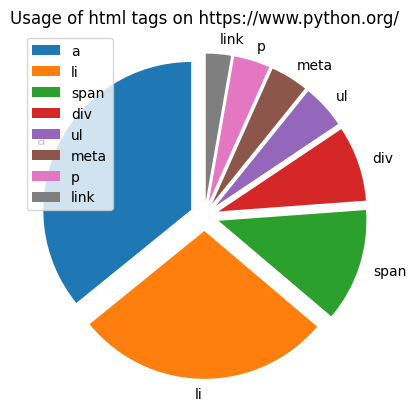

In [263]:
%matplotlib inline  
import matplotlib.pyplot as plt

ax1 = plt.subplot()
labels = list(parser_of_python.tag_count.keys())[:8]
amounts = list(parser_of_python.tag_count.values())[:8]

ax1.pie(amounts, labels=labels, startangle=90, explode=[0.1] * len(labels))

plt.legend(labels)
plt.title(f"Usage of html tags on {parser_of_python.url}")
plt.show()

Тепер повторимо для іншого сайта

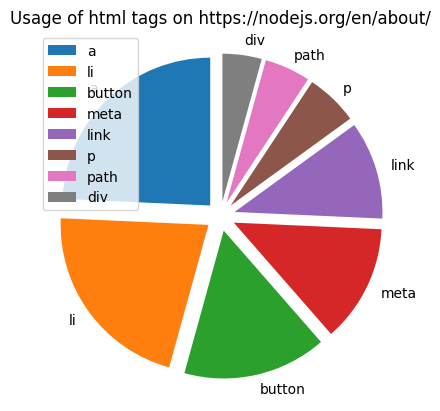

In [264]:
%matplotlib inline

parser_of_node = Parser("https://nodejs.org/en/about/")

with parser_of_node:
    parser_of_node.count_tags()

parser_of_node.order_tags()

import matplotlib.pyplot as plt

ax1 = plt.subplot()
labels = list(parser_of_node.tag_count.keys())[:8]
amounts = list(parser_of_node.tag_count.values())[:8]

ax1.pie(amounts, labels=labels, startangle=90, explode=[0.1] * len(labels))

plt.legend(labels)
plt.title(f"Usage of html tags on {parser_of_node.url}")
plt.show()

І на фінал, складемо значення і знову виведемо графік

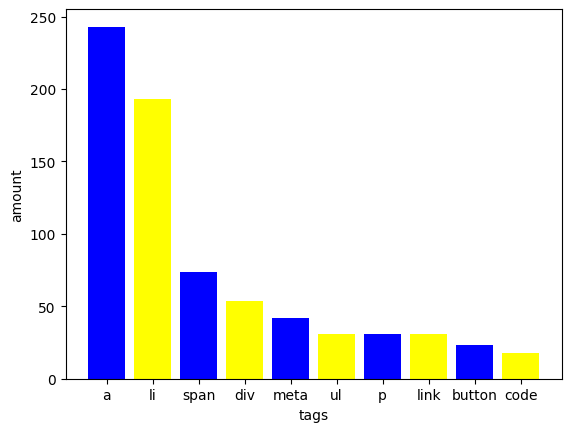

In [265]:
%matplotlib inline

summary_of_tags = parser_of_python + parser_of_node  # __add__

# Відсортуємо за зменшенням
summary_of_tags = dict(
    sorted(summary_of_tags.items(), key=lambda i: i[1], reverse=True)
)

plt.bar(
    list(summary_of_tags.keys())[:10],
    list(summary_of_tags.values())[:10],
    tick_label=list(summary_of_tags.keys())[:10],
    color=["blue", "yellow"]
)
plt.xlabel("tags")
plt.ylabel("amount")
plt.show()